<h1 align = "center">House Price Prediction</h1>

---

**Objective:** [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) is a free to use dataset provided in Kaggle. I'd previously used this dataset, however the results were poor. Let's see if my skills have increased! The notebook will serve to provide data analysis without any prior knowledge on the data. In this notebbok, let's discuss the following things:
 * **Understand the Dataset/Problem:** The given dataset has about `79` features, lets analyze each feature one by one and understand their practical impact.

In [11]:
# show current code version
# use https://semver.org/
# this file is kept to keep track of individual
# project/competitions progress in check
# the actual tag is represented as: <PROJECT_CODE>:<version>
open("VERSION", 'rt').read() # bump codecov

'development #semver-2.0.0'

## Code Imports

**PEP8 Style Guide** lists out the following *guidelines* for imports:
 1. Imports should be on separate lines,
 2. Import order should be:
    * standard library/modules,
    * related third party imports,
    * local application/user defined imports
 3. Wildcard import (`*`) should be avoided, else specifically tagged with **`# noqa: F403`** as per `flake8`
 4. Avoid using relative imports; use explicit imports instead.
 
For more details, visit [here](https://peps.python.org/pep-0008/#imports) for more information. Note, that actual `flake8` file is currently missing from the template, and will be later added if required. In addition, `logging` module is imported and configured.

[**`logging`**](https://docs.python.org/3/howto/logging.html) is a standard python module that is meant for tracking any events that happen during any software/code operations. This module is super powerful and helpful for code debugging and other purposes. The next section defines a `logging` configuration in **`/logs/`** directory. Each project is separated as `<PROJECT_CODE>/<VERSION>/<DATE>.log` file. The directory is automatically created, if not available. Use logging operations like:

```python
 >> logging.debug("This is a Debug Message.")
 >> logging.info("This is a Information Message.")
 >> logging.warning("This is a Warning Message.")
 >> logging.error("This is a ERROR Message.")
 >> logging.critical("This is a CRITICAL Message.")
```

In [48]:
import random

In [3]:
import logging # configure logging on `global arguments` section

In [4]:
from time import ctime # will be used in logging, file/output directory create etc.
from os import makedirs # create directories dynamically, if not already done so manually
from os.path import join # keep directories `os`-independent
from copy import deepcopy # `pd.Dataframe` is mutable, so any `df` operation may need `deepcopy`
from tqdm import tqdm as TQ # provide progress bar for code completions
from uuid import uuid1 as UUID # keep output file name unique
from datetime import datetime as dt # formatting datetime objects

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline
sns.set_style('whitegrid');
plt.style.use('default-style');
np.set_printoptions(precision = 3, threshold = 15)

## Define Global Arguments

In [5]:
# a single project can have multiple sub-projects and/or output
# generally, each sub-project has it's own `notebook` and code files
# use the `PROJECT_CODE` tag to create a directory of the format
# <execution date>/<PROJECT_CODE> thus giving an unique identity for
# each run of code. Once defined, keep this code same throughout.
# this code can also be used for keeping track on progress per
# sub-project level.
PROJECT_CODE = "House Price Prediction (data analysis)"

In [6]:
ROOT = "." # current directory
DATA = join(ROOT, "data")

In [7]:
# define output directory
# this is defined on current date
# `today` is so configured that it permits windows/*.nix file/directory names
today = dt.strftime(dt.strptime(ctime(), "%a %b %d %H:%M:%S %Y"), "%a, %b %d %Y")

print(f"Code Execution Started on: {today}") # only date

Code Execution Started on: Wed, Apr 06 2022


In [8]:
OUTPUT_DIR = join(ROOT, "output", today, PROJECT_CODE)
makedirs(OUTPUT_DIR, exist_ok = True) # create dir if not exist

# also create directory for `logs`
LOGS_DIR = join("/", "logs", PROJECT_CODE, open("VERSION", 'rt').read())
makedirs(LOGS_DIR, exist_ok = True)

In [9]:
logging.basicConfig(
    filename = join(LOGS_DIR, f"{today}.log"), # change `reports` file name
    filemode = "a", # append logs to existing file, if file exists
    format = "%(asctime)s - %(name)s - CLASS:%(levelname)s:%(levelno)s:L#%(lineno)d - %(message)s",
    level = logging.DEBUG
)

In [10]:
# set/change output file name
OUTPUT_FILE = f"{UUID()}.xlsx" # randomly generate names

# log/inform users of current output file name
logging.info(f"Output File : {join(OUTPUT_DIR, OUTPUT_FILE)}")
print(f"Output File : {join(OUTPUT_DIR, OUTPUT_FILE)}") # use this syntax

Output File : .\output\Wed, Apr 06 2022\House Price Prediction (data analysis)\e1490665-b5b0-11ec-b086-5405db104a4e.xlsx


In [11]:
INPUT_FILENAME = join(DATA, "train.csv") # let's start with `training` dataset

## Read & Process Input File(s)

In [12]:
def read_file(filename : str) -> pd.DataFrame:
    """
    Read a CSV File using `pd.read_csv()`
    
    The function is intended to read the given `training` and `testing` file,
    for the given project. Since we're dealing with the same type file for
    both the use case, the same function can be used to read and process both
    the training and testing file.
    
    :param filename: Input file name. Generally, this is either `train.csv` or
                     `test.csv` along with total (absolute/relative) path.
    """
    
    data = pd.read_csv(filename, index_col = 0)
    return data.copy() # deepcopy

### Understand the Dataset/Problem

The **objective** is to predict the **`SalePrice`** given various attributes that describes (almost) every aspect of residential homes in Ames, Iowa. In order to understand our data, let's look into each of the categories, and understand their relevance in comparison to the given problem. But, first let's check the distribution of `SalePrice`.

In [13]:
data = read_file(INPUT_FILENAME)

logging.info(f"{INPUT_FILENAME} Read using `read_file()`")
data.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1205,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,153500
1328,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,130500
69,30,RM,47.0,4608,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,80000
817,20,RL,NaN,11425,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,137000
1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,214000


#### Distribution of `SalePrice`

Obviously, the best way to get statistical information from a column is just by `df.column.describe()`, but let's make a good visual representation and plot everything with `seaborn`.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


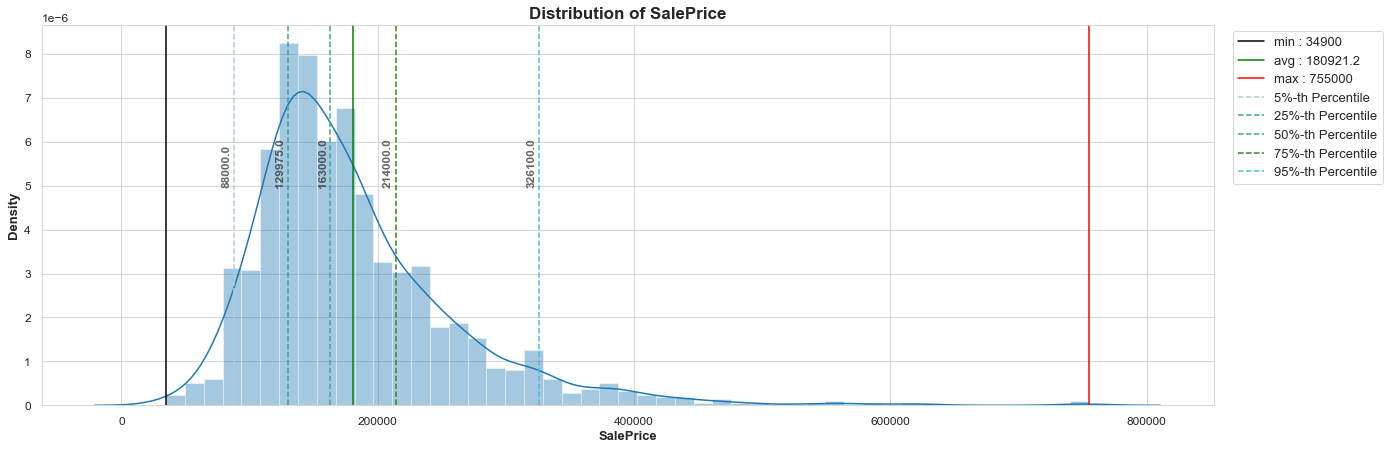

In [61]:
# ignore FutureWarning `displot`
# if `seaborn` is updated > '0.11.2'
# use `sns.displot` instead
# sns.displot(data.SalePrice)

sns.distplot(data.SalePrice)

# add `axvline` to denote span of the graph
# using `for` loop to reduce code duplicacy
for v, c, label in zip(
        [data.SalePrice.min(), data.SalePrice.mean(), data.SalePrice.max()], # v : x-value
        ['k', 'g', 'r'], # c : color
        ['min', 'avg', 'max'] # label : for legend
    ):
    plt.axvline(v, c = c, label = f"{label} : {round(v, 2)}")
    
# similarly, let's add percentile lines
for q in [5, 25, 50, 75, 95]:
    # q = percentile ∈ [0, 100]
    # check `np.percentile` for more
    color = "#" + "%06x" % random.randint(0, 0xFFFFFF) # randomly generate
    percentile = np.percentile(data.SalePrice, q)
    
    plt.text(percentile - 1e4, 5e-6, str(round(percentile, 3)), rotation = 'vertical', fontweight = 'bold', alpha = 0.7)
    plt.axvline(percentile, c = color, ls = "--", label = f"{q}%-th Percentile")

plt.title("Distribution of SalePrice")
plt.legend(loc = "upper right", bbox_to_anchor=(1.15, 1))
plt.show()

In statistics, **Normal Distribution** of data has many advantage while dealing with a *machine learning* problem. The advantage of normal distribution is explained in [Miami University Library](#mm-lib), and mathematically the distribution is formulated as:

$$
    f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}
$$

where, $f(x)$ is the probability density function, with a standard deviation of $\sigma$ and a mean of $\mu$.

Well, our `SalePrice` does not however follow the *normal distribution* as seen above. To understand this type of distribution we may look into `skewness` and `kurtosis`. As explained in [this article](#itl-nist-gov) - *skewness* is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. While, *kurtosis* is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

In [64]:
print(f"Skewness: {round(data.SalePrice.skew(), 6)}")
print(f"Kurtosis: {round(data.SalePrice.kurt(), 6)}")

Skewness: 1.882876
Kurtosis: 6.536282


## Reference

 * <a id = "mm-lib" href = "https://libanswers.lib.miamioh.edu/stats-faq/faq/343640">What are the advantages of the normal distribution?</a>
 * <a id = "itl-nist-gov" href = "https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm">Measures of Skewness and Kurtosis</a>